In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
np.random.seed(25)

In [27]:
'''The make_blob function randomly generates the specified number of datapoints witht the desired dimensionality'''

def createDataset(n_samples,n_features,n_centers):
    X,_=make_blobs(n_samples=n_samples,n_features=n_features,centers=n_centers,center_box=(8.0,15.0),cluster_std=0.35)
    '''
    The funciton returns 
        1. Datapoint tuples 
        2. Corresponding cluster labels 
    '''
    return X

In [28]:
'''
    Function to plot the 3 dimensional spacial arrangement of the data points
'''
def plot3D(X):
    fig = plt.figure(figsize=(10,7))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],X[:,2],c='c',alpha=1.0)
    ax.set_xlabel('A',fontsize=15,labelpad=12)
    ax.set_ylabel('B',fontsize=15,labelpad=12)
    ax.set_zlabel('C',fontsize=15,labelpad=12)
    ax.set_title('3-D Scatter Plot',fontsize=16,pad=16)
    plt.savefig('VisualizeDataset.png')
    plt.show()
    
def makeCSV(X,filename='dataset.csv'):
    df = pd.DataFrame({'A':X[:,0],'B':X[:,1],'C':X[:,1]})
    df.to_csv(filename,index=False)
    df.head()

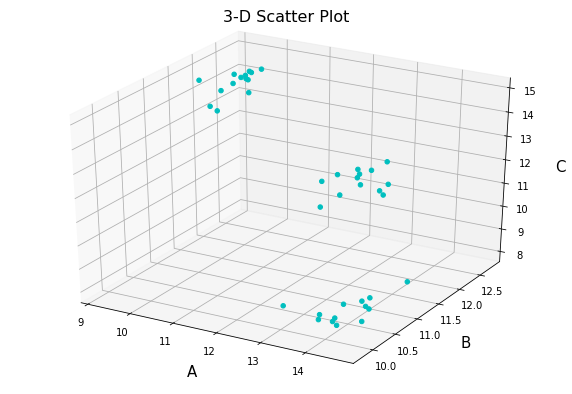

In [36]:
# creating dataset with 20 points & 3 features
data = createDataset(40,3,3)
# plotting the points
plot3D(data)
# saving data as csv
makeCSV(data)

In [37]:
# Array of colors that will be used for visually differentiating
# the points belonging to different clusters in the plots
m_colors = ['b','g','r','c','m','y','k']

# Function for calculating euclidean distance between two points
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

# Function to initialize the initial centroids
def initCentroid(k,init,points=None):
    assert init in ['random','dataset']
    if init=='dataset':
        assert type(points)!='NoneType'

    colors = m_colors[:k]
    clusters={}
    
    for i in range(k):
        if init == 'random':
            center = 7*(np.random.random((data.shape[1],)))+8
        if init == 'dataset':
            center = points[np.random.randint(k)]
        cluster={
            'center':center,
            'points':[],
            'color':colors[i]
        }

        clusters[i]=cluster
    
    return clusters

# Function to assign points from the dataset to the nearest cluster centroid
def assignPointsToClusters(clusters,X):
    k=len(clusters)

    ## Adding points to clusters
    for ix in range(X.shape[0]):
        dist=[]
        x_point=X[ix]
        for kx in range(k):
            d=distance(clusters[kx]['center'],x_point)
            dist.append(d)

        cluster_closest=np.argmin(dist)
        clusters[cluster_closest]['points'].append(x_point)
    
    return clusters


# Function to update the mean of the cluster centroid according to the points assigned to them
def updateClusters(clusters):   
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            clusters[kx]['center']=pts.mean(axis=0)  # updating center
        clusters[kx]['points']=[]                    # empty each cluster's point list
    
    return clusters



# Function to plot the dataset with clusters detected by the algorithm
def plotClusters(clusters,savefig=False,file='img.png'):
    fig = plt.figure(figsize=(10,7))
    ax = plt.axes(projection='3d')
    for kx in range(len(clusters)):
        pts= np.array(clusters[kx]['points'])
        try:
            # plotting the clusters with their colors
            ax.scatter3D(pts[:,0],pts[:,1],pts[:,2],c=clusters[kx]['color'],alpha=1.0)
        except:
            pass
        
        #plotting the centers
        center = clusters[kx]['center']
        ax.scatter3D(center[0],center[1],center[2],c='black',marker='*',alpha=1.0)
        ax.set_xlabel('A',fontsize=15,labelpad=12)
        ax.set_ylabel('B',fontsize=15,labelpad=12)
        ax.set_zlabel('C',fontsize=15,labelpad=12)
        ax.set_title('3-D Scatter Plot',fontsize=16,pad=16)
    
    if savefig:
        plt.savefig(file)
    plt.show()
    
    
# Function for implementing K-means algorithm
def KMeans(clusters,X,init = 'random'):
    cluster_lengths=[0 for _ in range(len(clusters))]
    while True:
        curr_lengths=[0 for _ in range(len(clusters))]
        clusters=assignPointsToClusters(clusters,X)
        
        for kx in range(len(clusters)):
            curr_lengths.append(len(clusters[kx]['points']))
        
        if cluster_lengths==curr_lengths:
            break
        else:
            cluster_lengths=curr_lengths
    
        clusters=updateClusters(clusters)

Centroid 1: [12.34738454 13.61623473 13.1198308 ]
Centroid 2: [13.72369036 13.98704117 13.48187933]
Centroid 3: [11.52381121 11.48339537 11.93693233]


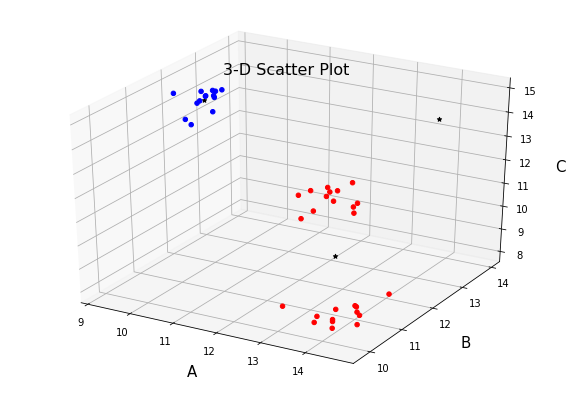

In [39]:
k=3
clusters = initCentroid(k,init = 'random')
for i in range(k):
    print(f"Centroid {i+1}: {clusters[i]['center']}")
KMeans(clusters,data)
plotClusters(clusters,True,'randomInit.png')

Centroid 1: [14.3690999   9.79209047  8.746297  ]
Centroid 2: [13.88622503  9.98332552  8.58469602]
Centroid 3: [14.3690999   9.79209047  8.746297  ]


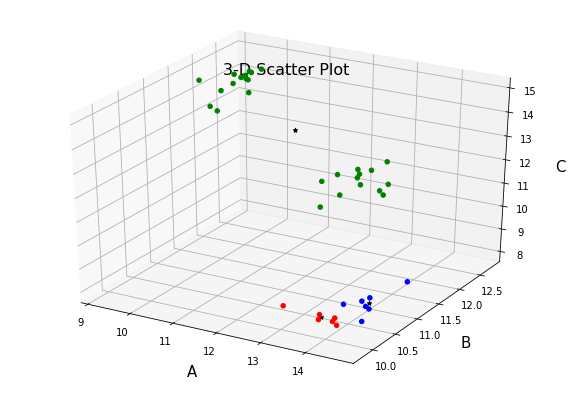

In [40]:
k=3
clusters = initCentroid(k,init = 'dataset',points=data)
for i in range(k):
    print(f"Centroid {i+1}: {clusters[i]['center']}")

KMeans(clusters,data)
plotClusters(clusters,True,'datasetInit.png')